In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue
import pandas as pd

In [2]:
area = 26  # cm^2
int_ein = 100e-3 # w/cm^2

In [30]:
ccurves = load_and_analyze([
        ('a', '3x3_hell', 6),
        # ('b_1', '3x3_schaltung_1', 6),
        ('b_2', '3x3_schaltung_2', 6),
        ('b_31', '3x3_schaltung_3', 6),
        ('b_41', '3x3_schaltung_4', 6),
        ('c_1', '3x3_verschattung_1', 6),
        ('c_2', '3x3_verschattung_2', 6),
        ('c_3', '3x3_verschattung_3', 6),
        ('d_1', 'huge_hell', 13),
        ('d_2', 'huge_verbraucher', 13)],
        int_ein,
        area=area,
        formatter='../messungen/191114_OM_VB/3_{}.dat'.format,
        columns=['desc', 'curve', 'area', 'j_c', 'u_cc', 'ff', 'eta', 'p_mlp', 'u_mlp', 'i_mlp'])


3x3_hell 0.6245592293371117
3x3_schaltung_2 3.9739599014265616
3x3_schaltung_3 4931.589315361373


3x3_schaltung_4 8.664709675467378
3x3_verschattung_1 0.8625916754957227
3x3_verschattung_2 0.6626737582881355


3x3_verschattung_3 0.8200366083399457
huge_hell 5.476550562755263
huge_verbraucher 3.959582958538259


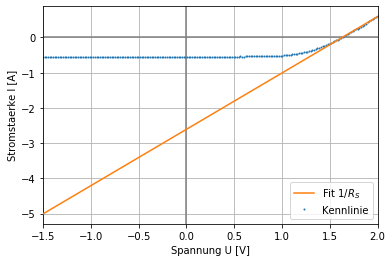

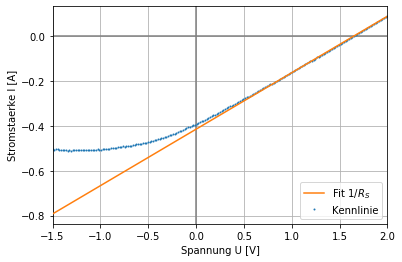

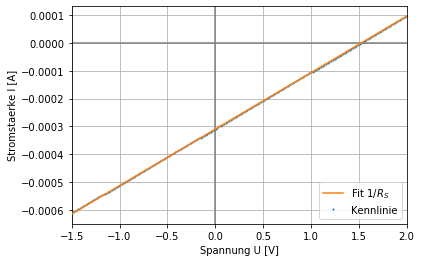

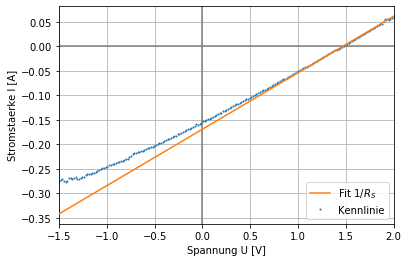

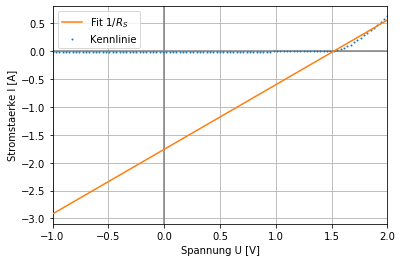

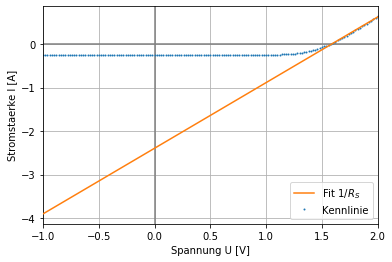

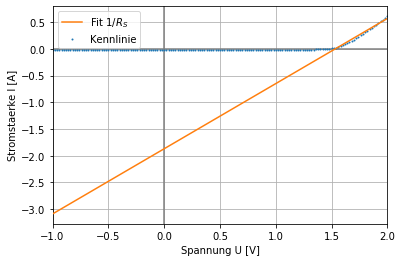

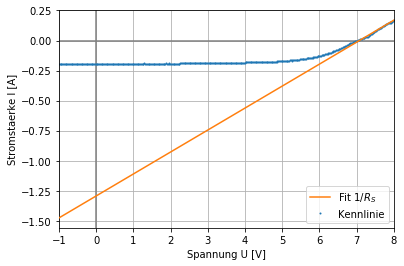

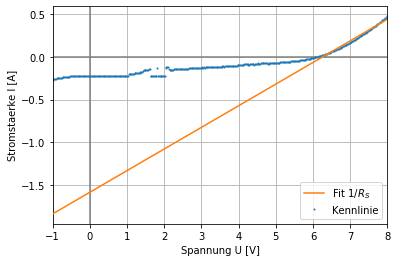

In [60]:
def lin(x, a, b):
    return a*x + b
rs = dict()
for _, curve in ccurves.iterrows():
    c = curve['curve']
    cg = c[c[:,1] > 0]
    popt, pcov = curve_fit(lin, *cg.T)
    f, a = plot_ccurve(c, label='Kennlinie')
    a.plot(c[:,0], lin(c[:,0], *popt), zorder=1000, label='Fit $1/R_S$')
    a.legend()
    save_fig(f, curve['desc']  + '_rs.pdf')
    rs[curve['desc']] = 1/popt[0]
    print(curve['desc'], 1/popt[0])
    

In [54]:
ccurves.loc['3x3_hell']['aht']

KeyError: 'aht'

3x3_hell 4829.672875332989
3x3_schaltung_2 12.260149943835113
3x3_schaltung_3 27.32225131778705


3x3_schaltung_4 3.4871621315913117
3x3_verschattung_1 781.1210886930061
3x3_verschattung_2 500.4631310673579


3x3_verschattung_3 1079.1258349574764
huge_hell 430.64220644999955
huge_verbraucher 23.011077088185388


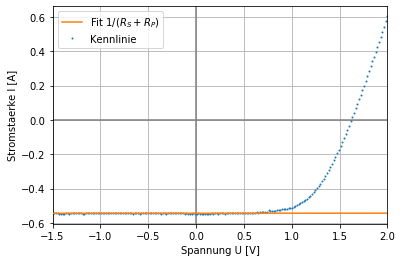

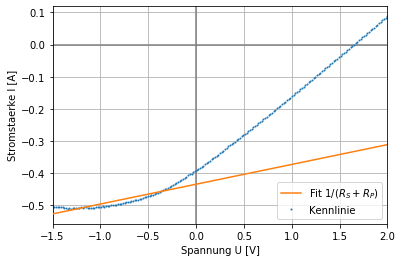

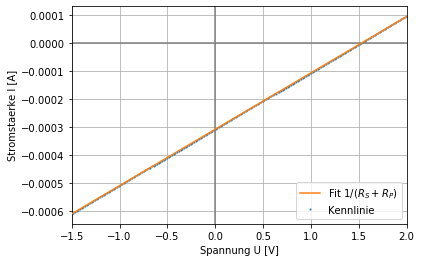

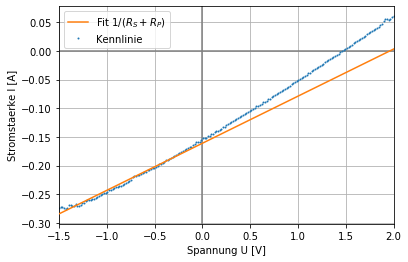

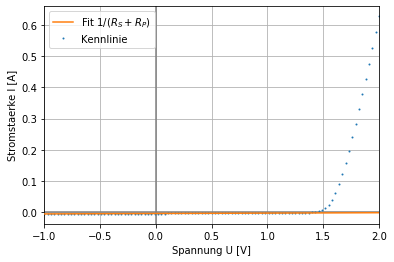

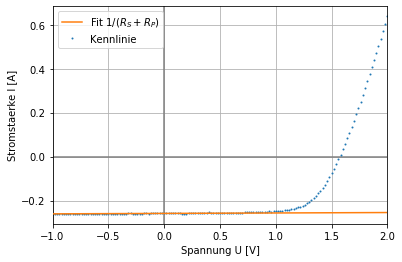

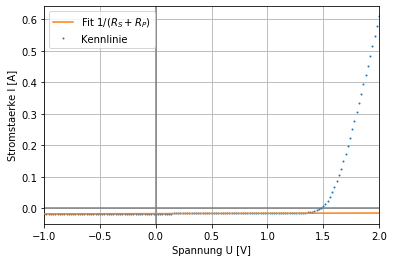

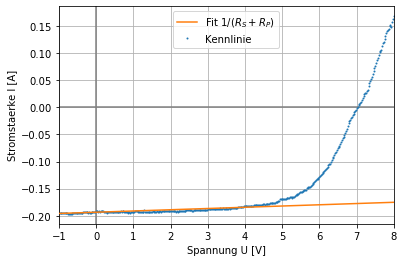

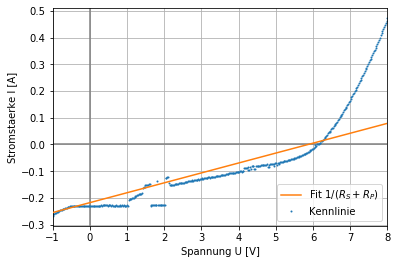

In [59]:
for _, curve in ccurves.iterrows():
    c = curve['curve']
    cg = c[c[:,0] < -.1]
    popt, pcov = curve_fit(lin, *cg.T)
    f, a = plot_ccurve(c, label='Kennlinie')
    a.plot(c[:,0], lin(c[:,0], *popt), zorder=1000, label='Fit $1/(R_S+R_P)$')
    a.legend()
    save_fig(f, curve['desc']  + '_rsrp.pdf')

    print(curve['desc'],1/popt[0]-rs[curve['desc']])

# Plot all ccurves

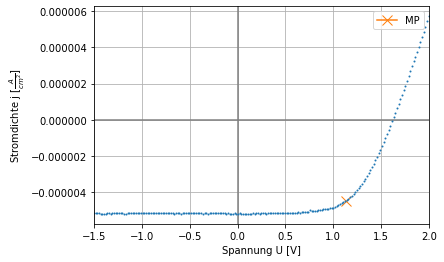

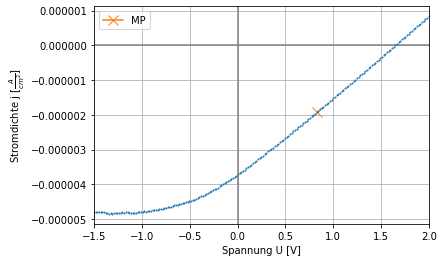

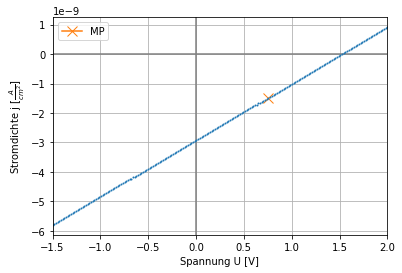

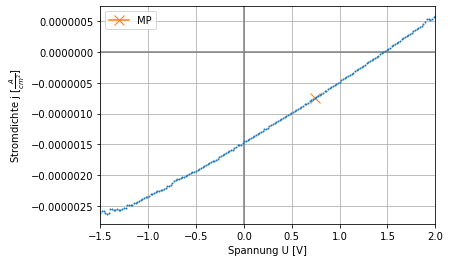

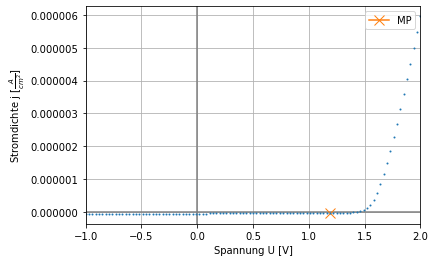

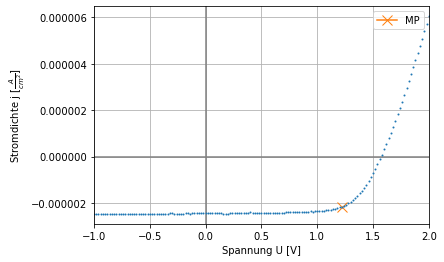

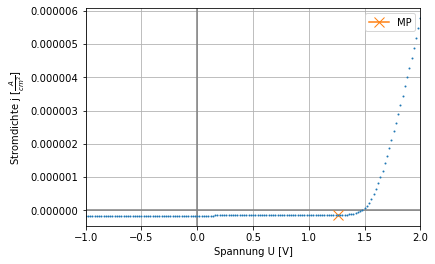

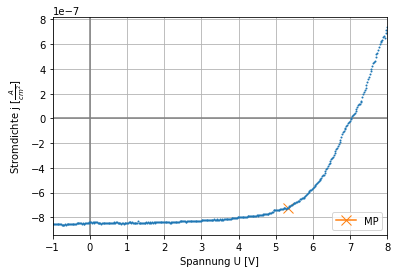

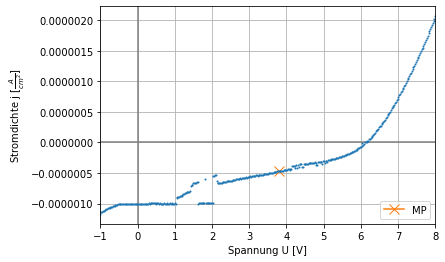

In [31]:
for _, curve in ccurves.iterrows():
    plot_ccurve(curve['curve'], area=area * curve['area'],
    save=f'C/{curve["desc"]}.pdf', mlp=[curve['u_mlp'], curve['i_mlp']])

In [16]:
ccurves.loc['huge_hell']

desc                                             huge_hell
curve    [[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...
area                                                    13
j_c                                              0.0147647
u_cc                                               7.02243
ff                                                0.653348
eta                                               0.677416
p_mlp                                             0.880641
u_mlp                                               5.3225
i_mlp                                  -0.1654561994540209
Name: huge_hell, dtype: object

In [24]:
ccurves['j_c']=ccurves['j_c']*1000

In [29]:
print(ccurves[['desc', 'j_c', 'u_cc', 'ff', 'eta']].round({'j_c': 6, 'u_cc': 2, 'ff': 2, 'eta': 6}).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
               desc &       j\_c &  u\_cc &    ff &       eta \\
\midrule
           3x3\_hell &  0.134430 &  1.62 &  0.60 &  0.001315 \\
    3x3\_schaltung\_1 &  0.098249 &  1.67 &  0.26 &  0.000427 \\
    3x3\_schaltung\_2 &  0.096670 &  1.65 &  0.26 &  0.000414 \\
    3x3\_schaltung\_3 &  0.000076 &  1.53 &  0.25 &  0.000000 \\
    3x3\_schaltung\_4 &  0.037735 &  1.46 &  0.26 &  0.000144 \\
 3x3\_verschattung\_1 &  0.001228 &  1.43 &  0.65 &  0.000011 \\
 3x3\_verschattung\_2 &  0.063305 &  1.57 &  0.69 &  0.000684 \\
 3x3\_verschattung\_3 &  0.004057 &  1.48 &  0.76 &  0.000045 \\
          huge\_hell &  0.021841 &  7.02 &  0.65 &  0.001002 \\
   huge\_verbraucher &  0.026106 &  6.11 &  0.29 &  0.000467 \\
\bottomrule
\end{tabular}



In [ ]:
.to_latex(index=False))

In [16]:
ccurves.round()

,desc,curve,area,j_c,u_cc,ff,eta,p_mlp,u_mlp,i_mlp
3x3_hell,3x3_hell,"[[-1.5, -0.5417189], [-1.4825, -0.5438931], [-...",4056,0.0,2.0,1.0,0.0,1.0,1.0,-0.4693348714285935
3x3_schaltung_1,3x3_schaltung_1,"[[-1.5, -0.4987553], [-1.4825, -0.4996429], [-...",4056,0.0,2.0,0.0,0.0,0.0,1.0,-0.20828160714286892
3x3_schaltung_2,3x3_schaltung_2,"[[-1.5, -0.5053194], [-1.4825, -0.5066954], [-...",4056,0.0,2.0,0.0,0.0,0.0,1.0,-0.20258660000002998
3x3_schaltung_3,3x3_schaltung_3,"[[-1.5, -0.0006112836], [-1.4825, -0.000607707...",4056,0.0,2.0,0.0,0.0,0.0,1.0,-0.00015580096971469002
3x3_schaltung_4,3x3_schaltung_4,"[[-1.5, -0.2743212], [-1.4825, -0.2720917], [-...",4056,0.0,1.0,0.0,0.0,0.0,1.0,-0.07911919453640125
3x3_verschattung_1,3x3_verschattung_1,"[[-1.0, -0.006214225], [-0.97, -0.006181907], ...",4056,0.0,1.0,1.0,0.0,0.0,1.0,-0.0039047434763039633
3x3_verschattung_2,3x3_verschattung_2,"[[-1.0, -0.2602277], [-0.98, -0.2602689], [-0....",4056,0.0,2.0,1.0,0.0,0.0,1.0,-0.22754981766503463
3x3_verschattung_3,3x3_verschattung_3,"[[-1.0, -0.01750273], [-0.98, -0.01755973], [-...",4056,0.0,1.0,1.0,0.0,0.0,1.0,-0.014582063482794307
huge_hell,huge_hell,"[[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...",8788,0.0,7.0,1.0,0.0,1.0,5.0,-0.1654561994540209
huge_verbraucher,huge_verbraucher,"[[-1.0, -0.2670641], [-0.9775, -0.258778], [-0...",8788,0.0,6.0,0.0,0.0,0.0,4.0,-0.10818945820239775
